**Install libraries**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Loading the dataset**

In [334]:
#load the dataset
df1 = pd.read_csv('C:/Users/USER/SLIIT/Y3S1 resources/z FDM Project life expectancy/life_expectancy_project/Life Expectancy Data.csv')

#preview
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [336]:
df1.shape

(2938, 22)

In [338]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Renaming columns**

In [341]:
# Rename the columns in the DataFrame
df1 = df1.rename(columns={
    'Life expectancy ': 'Life expectancy',
    ' BMI ': 'BMI',
    ' HIV/AIDS': 'HIV/AIDS',
    ' thinness  1-19 years': 'thinness 1-19 years',
    ' thinness 5-9 years': 'thinness 5-9 years',
    'Diphtheria ': 'Diphtheria'
})


In [343]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [345]:
#overview of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [347]:
#basic statistical summary
df1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Using one-hot to encode status column**

In [350]:
# encoding the categorical column 'status'
# In one-hot encoding, having both columns (Status_Developed and Status_Developing) is redundant because the information from one column can be inferred from the other
# By dropping Status_Developed
# If the value in Status_Developing is: 1 --> "Developing" and 0 --> "Developed"

df1 = pd.get_dummies(df1, columns=['Status'], drop_first=True)
df1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,True
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,True
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,True
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,True


In [352]:
#converting the one-hot encoded true/false to 1/0
df1['Status_Developing'] = df1['Status_Developing'].astype(int)
df1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1


**Handling null**

In [355]:
df1.isnull().sum()

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Status_Developing                    0
dtype: int64

In [357]:
# handling null of life expectancy column --> remove
df1 = df1.dropna(subset=['Life expectancy'])
df1.isnull().sum()

Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 1-19 years                 32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
Status_Developing                    0
dtype: int64

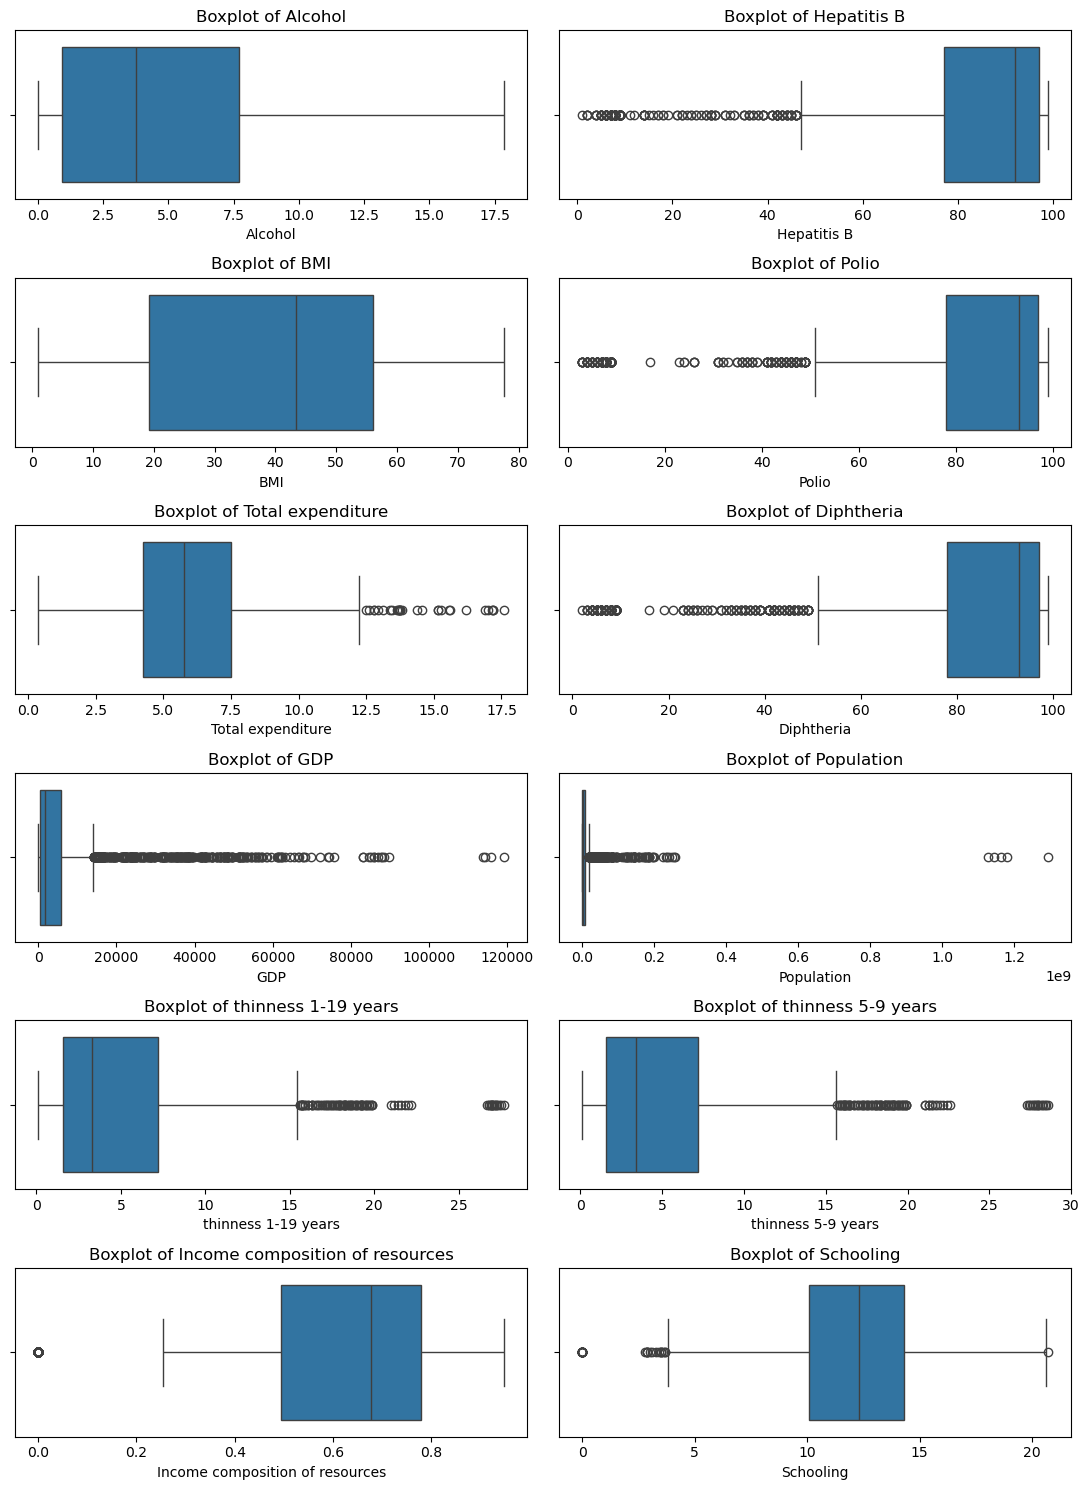

In [359]:
# Features with null values in your dataset
features_with_null = ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
                      'Diphtheria', 'GDP', 'Population', 'thinness 1-19 years', 
                      'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Set up the plot grid: 2 boxplots per row
plt.figure(figsize=(11, 15))  # Adjust the figure size based on your data and visualization needs
for i, feature in enumerate(features_with_null, 1):
    plt.subplot((len(features_with_null) + 1) // 2, 2, i)  # Create a grid of subplots, 2 per row
    sns.boxplot(x=df1[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [361]:
# When Median Imputation is a Good Option:
# Skewed Data
# Consistently Distributed Data

In [363]:
# List of features with null values
features_with_null = ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
                      'Diphtheria', 'GDP', 'Population', 'thinness 1-19 years', 
                      'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Loop through the list and impute each column with its median
for feature in features_with_null:
    df1.loc[:, feature] = df1[feature].fillna(df1[feature].median())

# Check if any null values remain
print(df1.isnull().sum())

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64


**Handling duplicates**

In [366]:
duplicate_rows = df1[df1.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


**Column analysis**

In [369]:
#Column Analysis:
#Country: May not be relevant unless you’re doing country-specific analysis. You can drop this if you’re not concerned with specific country-level predictions.
#Year: Could be useful for temporal analysis, but if you don’t plan to do time-series analysis, this could be dropped.
#Status: This could have a significant impact on life expectancy, so it should likely be retained.

In [371]:
unique_values = df1.nunique()
unique_values

Country                             183
Year                                 16
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2323
Hepatitis B                          87
Measles                             958
BMI                                 603
under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
HIV/AIDS                            200
GDP                                2485
Population                         2278
thinness 1-19 years                 200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
Status_Developing                     2
dtype: int64

In [373]:
df1.shape

(2928, 22)

In [375]:
df1.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


**Handling country catgorical variable**

In [378]:
#2 options:

#Target Mean Encoding
#When to use: when the dataset has a reasonable number of rows for each category and overfitting is not a major concern

#Leave-One-Out Encoding
#When to use: when you want to retain the benefits of target encoding but want to minimize overfitting, particularly in small datasets

In [380]:
# Check how many rows each country has
country_counts = df1['Country'].value_counts()
country_counts.to_string()

"Country\nAfghanistan                                             16\nNew Zealand                                             16\nNiger                                                   16\nNigeria                                                 16\nNorway                                                  16\nOman                                                    16\nPakistan                                                16\nPanama                                                  16\nPapua New Guinea                                        16\nParaguay                                                16\nPeru                                                    16\nPhilippines                                             16\nPoland                                                  16\nPortugal                                                16\nQatar                                                   16\nRepublic of Korea                                       16\nRepublic of Moldova           

In [382]:
# converting the country categorical using Target Mean Encoding
# mean life expectancy for each country

# Calculate the mean life expectancy for each country
target_mean = df1.groupby('Country')['Life expectancy'].mean()

# Save the target mean mapping to a file so you can reuse it later
target_mean.to_csv('country_mean_target_mapping.csv')

# Map the mean life expectancy to the 'Country' column using .loc
df1.loc[:, 'Country_Mean_Target'] = df1['Country'].map(target_mean)

# Drop the original 'Country' column 
df1 = df1.drop(columns=['Country'])

# Check the result
df1[['Country_Mean_Target', 'Life expectancy']].head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13736\2188295150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Country_Mean_Target'] = df1['Country'].map(target_mean)


,Country_Mean_Target,Life expectancy
0,58.19375,65.0
1,58.19375,59.9
2,58.19375,59.9
3,58.19375,59.5
4,58.19375,59.2


In [384]:
df1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Country_Mean_Target
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,58.19375
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,58.19375
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,58.19375
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,58.19375
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.19375


**Feature Engineering**

In [387]:
df1.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_Mean_Target'],
      dtype='object')

**Creating ratios**

**1. GDP per capita**

In [391]:
#GDP per capita
df1['GDP_per_capita'] = df1['GDP'] / (df1['Population'] + 1)  # Adding 1 to avoid division by zero

In [393]:
df1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Country_Mean_Target,GDP_per_capita
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,58.19375,0.000017
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,58.19375,0.001870
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,58.19375,0.000020
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,58.19375,0.000181
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.19375,0.000021


**2. Healthcare expenditure per capita**

In [396]:
#healthcare expenditure per capita
df1['Health_Expenditure_per_capita'] = df1['Total expenditure'] / (df1['Population'] + 1)

In [398]:
df1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Country_Mean_Target,GDP_per_capita,Health_Expenditure_per_capita
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,58.19375,0.000017,2.418746e-07
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,612.696514,327582.0,17.5,17.5,0.476,10.0,1,58.19375,0.001870,2.497077e-05
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,58.19375,0.000020,2.562108e-07
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,58.19375,0.000181,2.304597e-06
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.19375,0.000021,2.642181e-06


**Creating interaction terms**

**1.alcohol and schooling**

In [402]:
#alcohol and schooling
df1['Alcohol_Schooling_Interaction'] = df1['Alcohol'] * df1['Schooling']

In [404]:
df1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Country_Mean_Target,GDP_per_capita,Health_Expenditure_per_capita,Alcohol_Schooling_Interaction
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,33736494.0,17.2,17.3,0.479,10.1,1,58.19375,0.000017,2.418746e-07,0.101
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,327582.0,17.5,17.5,0.476,10.0,1,58.19375,0.001870,2.497077e-05,0.100
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,31731688.0,17.7,17.7,0.470,9.9,1,58.19375,0.000020,2.562108e-07,0.099
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,3696958.0,17.9,18.0,0.463,9.8,1,58.19375,0.000181,2.304597e-06,0.098
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,2978599.0,18.2,18.2,0.454,9.5,1,58.19375,0.000021,2.642181e-06,0.095


In [410]:
df1.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_Mean_Target', 'GDP_per_capita',
       'Health_Expenditure_per_capita', 'Alcohol_Schooling_Interaction'],
      dtype='object')

**Outliers**

In [413]:
# checking for outliers
# outliers can distort the model performance
# 3 ways to handle them : removing / capping / ignoring
# if i remove outliers --- Loss of Information, Biased Results, and Reduced Sample Size

# capping --- cz i want to preserve most of the data for analysis and to avoid Skewed Results
#IQR method ---> to determine the lower and upper bounds to apply .clip() 

In [415]:
# number of outliers in each column
def detect_outliers_iqr(df1):
    outliers = {}
    for column in df1.select_dtypes(include=['float64', 'int64']).columns:  # Apply only to numerical columns
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers in the column
        outliers[column] = ((df1[column] < lower_bound) | (df1[column] > upper_bound)).sum()
    return outliers

# Detect outliers in all numerical columns
outliers_dict = detect_outliers_iqr(df1)

# outliers count for each column one by one
for column, count in outliers_dict.items():
    print(f"{column} - {count}")

Year - 0
Life expectancy - 10
Adult Mortality - 82
infant deaths - 315
Alcohol - 3
percentage expenditure - 388
Hepatitis B - 320
Measles  - 542
BMI - 0
under-five deaths  - 394
Polio - 278
Total expenditure - 49
Diphtheria - 297
HIV/AIDS - 542
GDP - 445
Population - 452
thinness 1-19 years - 100
thinness 5-9 years - 99
Income composition of resources - 130
Schooling - 75
Country_Mean_Target - 0
GDP_per_capita - 482
Health_Expenditure_per_capita - 514
Alcohol_Schooling_Interaction - 10


In [417]:
# capping the outliers of the columns 
# Alcohol
# percentage expenditure
# Total expenditure
# GDP
# Population
# thinness 1-19 years
# thinness 5-9 years
# Income composition of resources
# Schooling
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# columns to cap
columns_to_cap = ['Alcohol', 'percentage expenditure', 'Total expenditure', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Applying the capping function to each column
for col in columns_to_cap:
    cap_outliers(df1, col)

In [419]:
# recheking the number of outliers in each column
def detect_outliers_iqr(df1):
    outliers = {}
    for column in df1.select_dtypes(include=['float64', 'int64']).columns:  # Apply only to numerical columns
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers in the column
        outliers[column] = ((df1[column] < lower_bound) | (df1[column] > upper_bound)).sum()
    return outliers

# Detect outliers in all numerical columns
outliers_dict = detect_outliers_iqr(df1)

# outliers count for each column one by one
for column, count in outliers_dict.items():
    print(f"{column} - {count}")

Year - 0
Life expectancy - 10
Adult Mortality - 82
infant deaths - 315
Alcohol - 0
percentage expenditure - 0
Hepatitis B - 320
Measles  - 542
BMI - 0
under-five deaths  - 394
Polio - 278
Total expenditure - 0
Diphtheria - 297
HIV/AIDS - 542
GDP - 0
Population - 0
thinness 1-19 years - 0
thinness 5-9 years - 0
Income composition of resources - 0
Schooling - 0
Country_Mean_Target - 0
GDP_per_capita - 482
Health_Expenditure_per_capita - 514
Alcohol_Schooling_Interaction - 10


In [421]:
# cons of capping the outliers of 'life expectancy' column
# 1. Loss of Valuable Information
# 2. Biased Predictions

**Standardization**

In [424]:
# STANDARDIZATION 
# unsure which models will be used
# safe to use standardization, as it works well for most models

# transforms data to have a mean of 0 and a standard deviation of 1
# ensure that all features contribute equally to the model's performance

In [426]:
# Columns to standardize
columns_to_standardize = ['Adult Mortality', 'infant deaths', 'percentage expenditure', 
                          'Hepatitis B', 'Measles ', 'Polio', 'Diphtheria', 'HIV/AIDS', 
                          'Total expenditure', 'GDP', 'Population', 'BMI', 
                          'under-five deaths ', 'thinness 1-19 years', 'thinness 5-9 years', 
                          'Income composition of resources', 'Schooling', 'GDP_per_capita', 
                          'Health_Expenditure_per_capita', 'Alcohol_Schooling_Interaction', 
                          'Country_Mean_Target']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df1[columns_to_standardize] = scaler.fit_transform(df1[columns_to_standardize])

df1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Country_Mean_Target,GDP_per_capita,Health_Expenditure_per_capita,Alcohol_Schooling_Interaction
0,2015,65.0,0.790238,0.267520,0.01,-0.547270,-0.786715,-0.110924,-0.966625,0.254061,...,1.993363,2.707976,2.736724,-0.808915,-0.633843,1,-1.204107,-0.067957,-0.063511,-1.008113
1,2014,59.9,0.854614,0.284455,0.01,-0.541521,-0.917501,-0.168570,-0.991809,0.272732,...,-0.742597,2.707976,2.736724,-0.824512,-0.666115,1,-1.204107,-0.067531,-0.060856,-1.008129
2,2013,59.9,0.830473,0.301391,0.01,-0.542301,-0.830310,-0.173968,-1.016993,0.291403,...,1.993363,2.707976,2.736724,-0.855706,-0.698387,1,-1.204107,-0.067957,-0.063509,-1.008146
3,2012,59.5,0.862660,0.326794,0.01,-0.529581,-0.699524,0.031273,-1.042177,0.316299,...,0.133087,2.707976,2.736724,-0.892099,-0.730658,1,-1.204107,-0.067919,-0.063289,-1.008162
4,2011,59.2,0.886801,0.343730,0.01,-0.711706,-0.655928,0.050953,-1.062324,0.341194,...,-0.053611,2.707976,2.736724,-0.938890,-0.827474,1,-1.204107,-0.067956,-0.063253,-1.008212


In [428]:
df1.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_Mean_Target', 'GDP_per_capita',
       'Health_Expenditure_per_capita', 'Alcohol_Schooling_Interaction'],
      dtype='object')

**Splitting the dataset**

In [431]:
# Defining the target variable (y) and the features (X)
X = df1.drop(columns=['Life expectancy'])  # Features
y = df1['Life expectancy']  # Target

In [433]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Models**

In [436]:
# linear regression
# decision tree
# random forest
# gradient boosting regression
# support vector regression
# k-nearest neighbors regressor
# ridge regression
# lasso regression
# elasticnet regression

In [438]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**Model Training and evaluation**

In [440]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting (XGBoost)": XGBRegressor(),  
    "Support Vector Regression": SVR(),
    "k-NN": KNeighborsRegressor(n_neighbors=5),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test and train data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics for the test data
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate metrics for the training data
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Display results for the train data
    print(f"Train Set")
    print(f"Mean Squared Error : {mse_train}")
    print(f"Root Mean Squared Error : {rmse_train}")
    print(f"Mean Absolute Error : {mae_train}")
    print(f"R-squared : {r2_train}")

    # Display results for the test data
    print(f"\nTest Set")
    print(f"Mean Squared Error : {mse_test}")
    print(f"Root Mean Squared Error : {rmse_test}")
    print(f"Mean Absolute Error : {mae_test}")
    print(f"R-squared : {r2_test}\n")

--- Linear Regression ---
Train Set
Mean Squared Error : 3.7930624556844466
Root Mean Squared Error : 1.9475786134799402
Mean Absolute Error : 1.2349738040915308
R-squared : 0.9584067147567631

Test Set
Mean Squared Error : 3.5207774371397123
Root Mean Squared Error : 1.8763734801845053
Mean Absolute Error : 1.2480451185350663
R-squared : 0.9602451458186646

--- Decision Tree ---
Train Set
Mean Squared Error : 6.467177361333658e-32
Root Mean Squared Error : 2.5430645609841794e-16
Mean Absolute Error : 9.101742985825366e-18
R-squared : 1.0

Test Set
Mean Squared Error : 4.744112627986349
Root Mean Squared Error : 2.1780983972232173
Mean Absolute Error : 1.1735494880546073
R-squared : 0.9464318579879762

--- Random Forest ---
Train Set
Mean Squared Error : 0.33084234158838566
Root Mean Squared Error : 0.5751889616364223
Mean Absolute Error : 0.31769854824935856
R-squared : 0.9963721082779421

Test Set
Mean Squared Error : 2.326137167235493
Root Mean Squared Error : 1.525167914439421
Mean

In [442]:
# Test Set -- R²: Higher values indicate better performance
# Test Set -- Root Mean Squared Error (RMSE): Lower values suggest better predictive accuracy

# Good Generalization: The model performs well on both the training and testing sets with similar metrics (high R², low MSE/RMSE), meaning it generalizes well to new, unseen data.

In [445]:
# Best models --> Random Forest, Gradient Boosting (XGBoost), Ridge Regression

**Plot Train vs Test R-squared score for Random Forest Regression model**

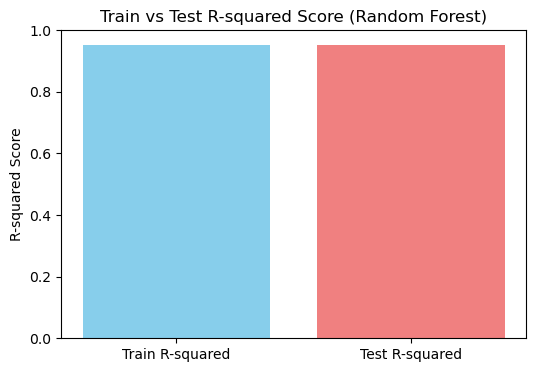

In [448]:
# Plot Train vs Test R-squared scores
plt.figure(figsize=(6, 4))
plt.bar(['Train R-squared', 'Test R-squared'], [r2_train, r2_test], color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)  # Set y-axis limit to make comparison clear
plt.ylabel('R-squared Score')
plt.title('Train vs Test R-squared Score (Random Forest)')
plt.show()

In [450]:
feature_names = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 
                 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', 
                 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 
                 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 
                 'Status_Developing', 'Country_Mean_Target', 'GDP_per_capita', 
                 'Health_Expenditure_per_capita', 'Alcohol_Schooling_Interaction']

# Convert the input values into a DataFrame using the feature names
input_values = [[2013, -0.786962076, -0.240548872, 8.2, 2.086408971, -1.222670148, 
                 -0.204184427, 1.385555779, -0.250068634, 0.359027363, -1.843949472, 
                 0.364166301, -0.324054557, 2.019536541, 1.993363417, -1.067510351, 
                 -1.060978991, 1.426659172, 1.237926683, 1, 1.360349654, 
                 -0.067618089, -0.063531572, 1.142983012]]

# Create a DataFrame for the input values
input_df = pd.DataFrame(input_values, columns=feature_names)

# Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions using the DataFrame with feature names
predicted_life_expectancy = rf_model.predict(input_df)
print(f"Predicted Life Expectancy (Random Forest): {predicted_life_expectancy[0]}")

# expected 81.8

Predicted Life Expectancy (Random Forest): 82.22700000000007


In [451]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'best_model_random_forest.pkl')

['best_model_random_forest.pkl']

In [454]:
column_count = df1.shape[1]
column_count

25

In [456]:
df1.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_Mean_Target', 'GDP_per_capita',
       'Health_Expenditure_per_capita', 'Alcohol_Schooling_Interaction'],
      dtype='object')

**Feature Importance**

**Train the Random Forest and get feature importance**

In [460]:
# Load the saved Random Forest model
rf_model = joblib.load('best_model_random_forest.pkl')

# Define the feature columns
features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Hepatitis B', 'Measles ', 'BMI', 'under-five deaths ', 'Polio', 
            'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
            'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
            'Schooling', 'Status_Developing', 'Country_Mean_Target', 
            'GDP_per_capita', 'Health_Expenditure_per_capita', 
            'Alcohol_Schooling_Interaction']

# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

                            Feature  Importance
20              Country_Mean_Target    0.923215
0                              Year    0.029115
1                   Adult Mortality    0.017098
17  Income composition of resources    0.005088
12                         HIV/AIDS    0.002478
18                        Schooling    0.002145
7                               BMI    0.001750
6                          Measles     0.001741
15              thinness 1-19 years    0.001493
21                   GDP_per_capita    0.001482
10                Total expenditure    0.001476
16               thinness 5-9 years    0.001465
23    Alcohol_Schooling_Interaction    0.001416
22    Health_Expenditure_per_capita    0.001378
9                             Polio    0.001240
3                           Alcohol    0.001232
5                       Hepatitis B    0.001163
11                       Diphtheria    0.000948
13                              GDP    0.000937
8                under-five deaths     0

**Plot the feature importance**

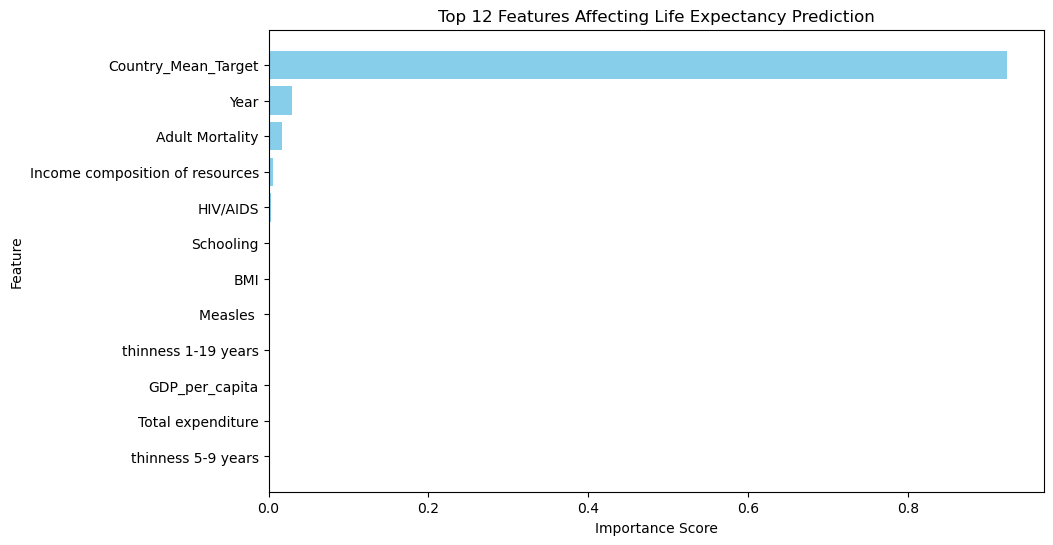

In [463]:
# Plot the top N features
top_n = 12  
top_features = importance_df['Feature'].head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features, importance_df['Importance'].head(top_n), color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 12 Features Affecting Life Expectancy Prediction')
plt.gca().invert_yaxis()  
plt.show()

**Reduce the dataset to the top 12 important features**

In [466]:
# List of the top 12 important features
top_12_features = ['Country_Mean_Target', 'Year', 'Adult Mortality', 
                   'Income composition of resources', 'HIV/AIDS', 'Schooling', 
                   'BMI', 'Measles ', 'thinness 1-19 years', 'Total expenditure', 
                   'thinness 5-9 years', 'GDP_per_capita']

# Create a new DataFrame with only the top 12 features
df_top_12 = df1[top_12_features]

# Verify the new DataFrame
print(df_top_12.head())

df_top_12.to_csv('top_12_features_data.csv', index=False)

   Country_Mean_Target  Year  Adult Mortality  \
0            -1.204107  2015         0.790238   
1            -1.204107  2014         0.854614   
2            -1.204107  2013         0.830473   
3            -1.204107  2012         0.862660   
4            -1.204107  2011         0.886801   

   Income composition of resources  HIV/AIDS  Schooling       BMI  Measles   \
0                        -0.808915 -0.324055  -0.633843 -0.966625 -0.110924   
1                        -0.824512 -0.324055  -0.666115 -0.991809 -0.168570   
2                        -0.855706 -0.324055  -0.698387 -1.016993 -0.173968   
3                        -0.892099 -0.324055  -0.730658 -1.042177  0.031273   
4                        -0.938890 -0.324055  -0.827474 -1.062324  0.050953   

   thinness 1-19 years  Total expenditure  thinness 5-9 years  GDP_per_capita  
0             2.707976           0.994564            2.736724       -0.067957  
1             2.707976           1.003311            2.736724       -0

**Retrain the Model with Top 12 Features and Make Predictions**

In [469]:
# List of the top 12 important features
top_12_features = ['Country_Mean_Target', 'Year', 'Adult Mortality', 
                   'Income composition of resources', 'HIV/AIDS', 'Schooling', 
                   'BMI', 'Measles ', 'thinness 1-19 years', 'Total expenditure', 
                   'thinness 5-9 years', 'GDP_per_capita']

# Create a new DataFrame with only the top 12 features
df_top_12 = df1[top_12_features]

# Target variable (y) and features (X)
X = df_top_12  # Features (top 12 features)
y = df1['Life expectancy']  

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Random Forest Regressor
rf_model_top_12 = RandomForestRegressor(random_state=1)

# Train the model on the training data
rf_model_top_12.fit(X_train, y_train)

# Save the retrained model
joblib.dump(rf_model_top_12, 'rf_model_top_12_features.pkl')

# Make predictions with new input values
input_values = np.array([[1.360349654, 2013, -0.786962076, 1.426659172, -0.324054557, 
                          1.237926683, 1.385555779, -0.204184427, -1.067510351, 
                          -1.843949472, -1.060978991, -0.067618089]])

# Ensure input values match the number of features
predicted_life_expectancy = rf_model_top_12.predict(input_values)

# Print the prediction result
print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]}\n")

# Evaluate the model on the training set
y_train_pred = rf_model_top_12.predict(X_train)

# Calculate training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print training evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}\n")

# Evaluate the new model on the test set
y_test_pred = rf_model_top_12.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Predicted Life Expectancy: 82.15000000000009

Training MSE: 0.34083382877882146
Training RMSE: 0.5838097539257301
Training MAE: 0.31303116994022234
Training R²: 0.9962625454163834

Test MSE: 2.150527662116042
Test RMSE: 1.4664677501111445
Test MAE: 0.8269999999999992
Test R²: 0.9757173194992391


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Scatter Plot : Actual vs Predicted Life Expectancy (Train and Test)**

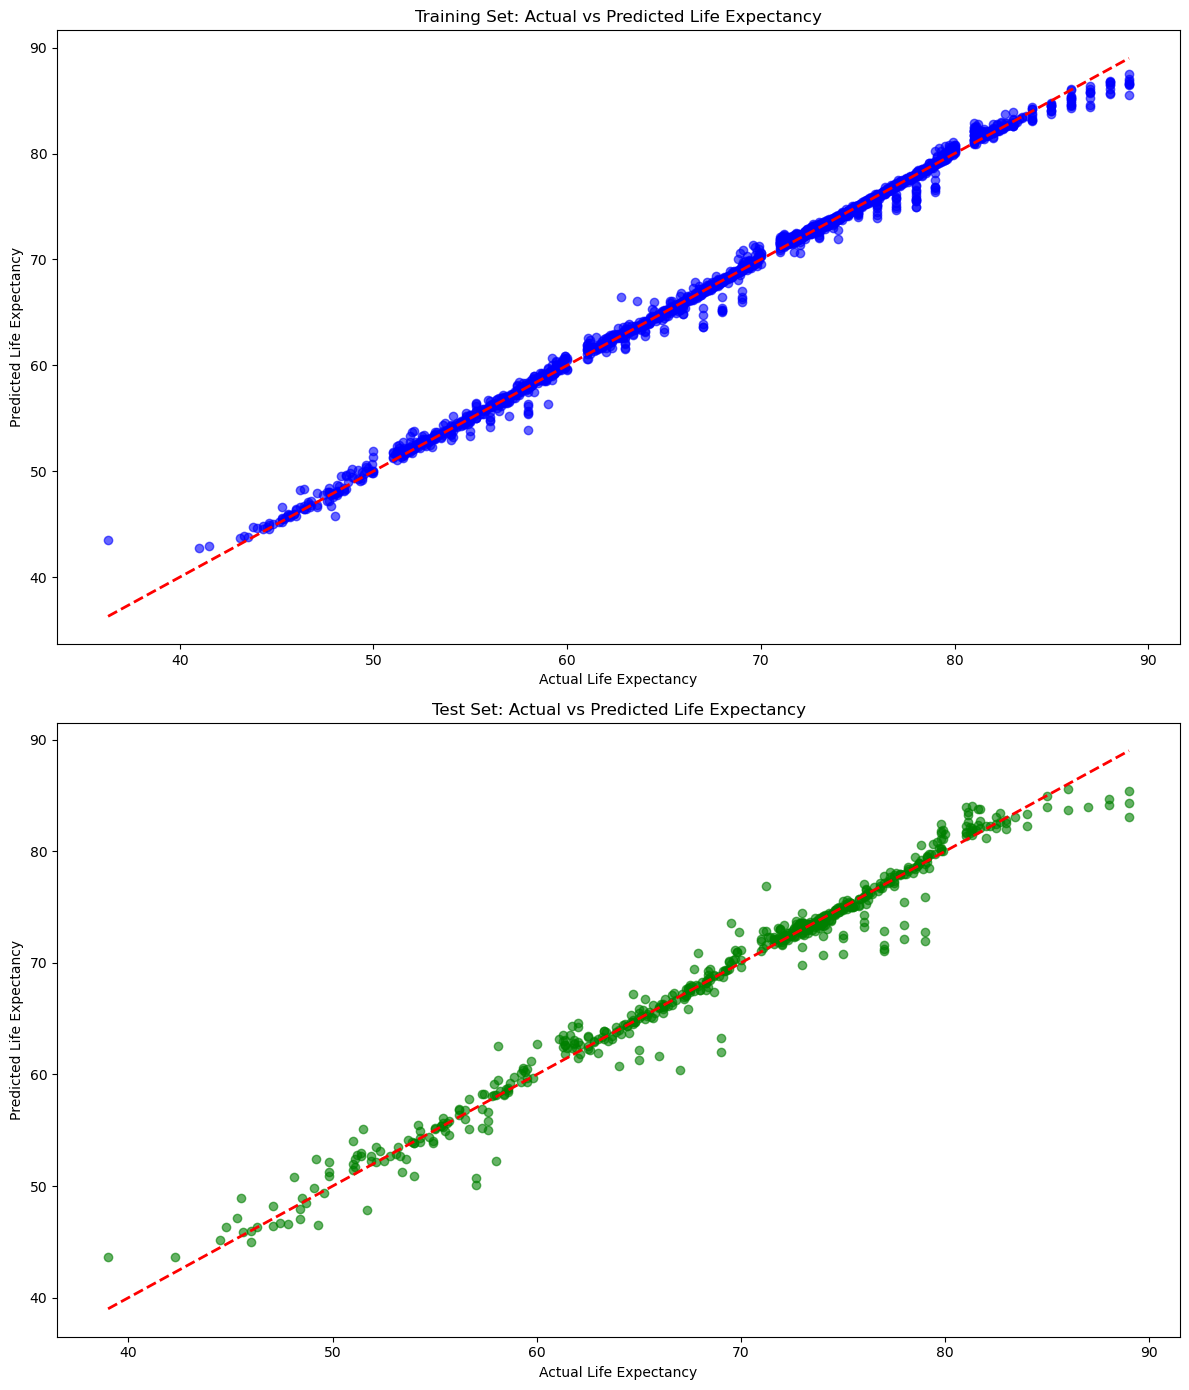

In [472]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 14))

# Scatter plot for the training set
plt.subplot(2, 1, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
plt.title('Training Set: Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Scatter plot for the test set
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Test Set: Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Hyperparamater Tuning - GridSearchCV**

In [475]:
from sklearn.model_selection import GridSearchCV

# default hyperparameters
# n_estimators=100
# max_depth=None
# min_samples_split=2
# min_samples_leaf=1
# max_features='auto'
# bootstrap=True

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    # A larger number of trees generally leads to better performance, but also increases the computation time
    
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    # Controlling tree depth helps in avoiding overfitting. The deeper the tree, the more it can learn complex patterns, but it can also lead to overfitting.
    
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for the best split
    #  Determines how many features the model considers when looking for the best split
    # (None = use all features at each split, sqrt = use the square root of the number of features, log2 = use the log base 2 of the number of features)
    
    'bootstrap': [True, False]         # Whether bootstrap samples are used
    # Controls whether or not the model samples the data with replacement (bootstrapping)
    # Including both True and False allows GridSearchCV to try both options and find which one gives better results for your specific dataset
    # True means sampling with replacement
    # False means without replacement 
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=1)

# Initialize GridSearchCV with the random forest and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best parameters on the full training set
best_rf_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_rf_model, 'best_rf_model_with_tuned_hyperparameters.pkl')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


['best_rf_model_with_tuned_hyperparameters.pkl']

In [477]:
# Evaluation of the Training Set
# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Calculate and print evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("--- Training Set Evaluation ---")
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}")

# Evaluation of the Test Set
# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n--- Test Set Evaluation ---")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

--- Training Set Evaluation ---
Training MSE: 0.33343979910333166
Training RMSE: 0.5774424638899807
Training MAE: 0.3090209222886424
Training R²: 0.996343625543321

--- Test Set Evaluation ---
Test MSE: 2.173011316126279
Test RMSE: 1.4741137392095223
Test MAE: 0.8257994880546019
Test R²: 0.9754634453471238


In [479]:
# CONCLUSION : 
# The model performs exceptionally well on both the training and test sets, with low errors and high R² values.
# There is no significant overfitting

**Re-analyze Feature Importance After Tuning**

In [482]:
# Get feature importance from the best Random Forest model after hyperparameter tuning
importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to show feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

                            Feature  Importance
0               Country_Mean_Target    0.924230
1                              Year    0.029894
2                   Adult Mortality    0.018810
3   Income composition of resources    0.006066
4                          HIV/AIDS    0.003078
5                         Schooling    0.002910
11                   GDP_per_capita    0.002879
6                               BMI    0.002663
7                          Measles     0.002604
9                 Total expenditure    0.002474
8               thinness 1-19 years    0.002364
10               thinness 5-9 years    0.002029


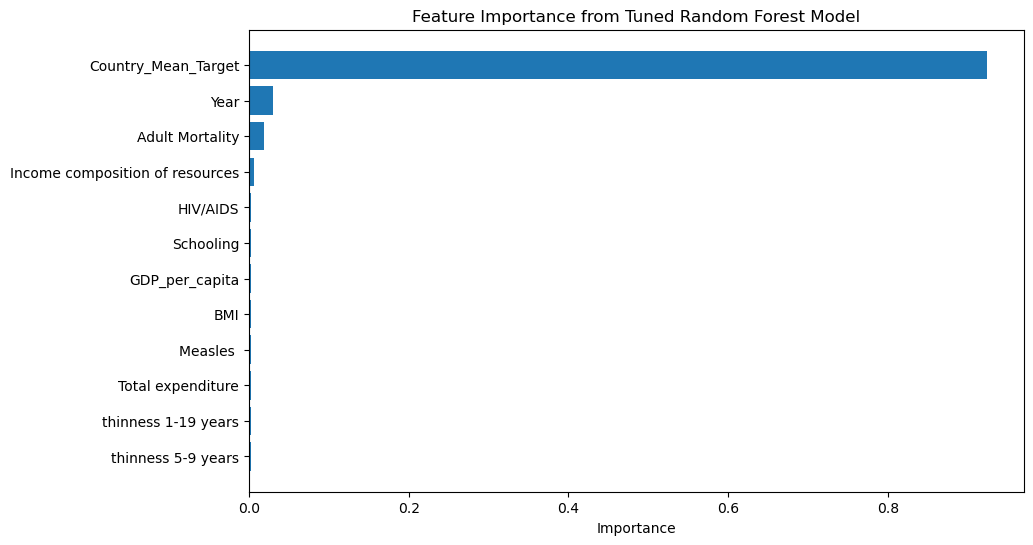

In [484]:
# Plot the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Tuned Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

**Retraining and Evaluate with the Top 12 Features and best hyperparameters**

In [487]:
# List of the top 12 important features
top_12_features = ['Country_Mean_Target', 'Year', 'Adult Mortality', 
                   'Income composition of resources', 'HIV/AIDS', 'Schooling', 
                   'BMI', 'Measles ', 'thinness 1-19 years', 'Total expenditure', 
                   'thinness 5-9 years', 'GDP_per_capita']

# Create a new DataFrame with only the top 12 features
df_top_12 = df1[top_12_features]

# Define X and y
X = df_top_12  # Features (top 12 features)
y = df1['Life expectancy']  # Target variable

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_train is the training data with the top 12 features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data

# Save the fitted scaler to a file for future use
joblib.dump(scaler, 'scaler.pkl')


# Initialize Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=30,
    max_features=None,  # No restriction on features
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=1
)

# Train the model with the reduced dataset (top 12 features)
best_rf_model.fit(X_train, y_train)

# Save the retrained model
joblib.dump(best_rf_model, 'final_best_rf_model_with_top_12_features.pkl')

# Provided input values for the top 12 features
input_values = np.array([[1.360349654, 2013, -0.786962076, 1.426659172, -0.324054557, 
                          1.237926683, 1.385555779, -0.204184427, -1.067510351, 
                          -1.843949472, -1.060978991, -0.067618089]])

# Make sure the shape of input values matches the training set
predicted_life_expectancy = best_rf_model.predict(input_values)

# Print the predicted life expectancy value
print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]}")

# Evaluate on the Training Set
# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print training set evaluation results
print("\n--- Training Set Evaluation with Top 12 Features ---")
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}")


# Evaluate on the Test Set
# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test set evaluation results
print("\n--- Test Set Evaluation with Top 12 Features ---")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

Predicted Life Expectancy: 82.02949999999981

--- Training Set Evaluation with Top 12 Features ---
Training MSE: 0.33343979910333166
Training RMSE: 0.5774424638899807
Training MAE: 0.3090209222886424
Training R²: 0.996343625543321

--- Test Set Evaluation with Top 12 Features ---
Test MSE: 2.173011316126279
Test RMSE: 1.4741137392095223
Test MAE: 0.8257994880546019
Test R²: 0.9754634453471238


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Cross validation**

In [490]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best model
# data is divided into 5 equally-sized subsets (folds)
cv_mse_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

# Convert negative MSE and MAE scores to positive
cv_mse_scores = -cv_mse_scores
cv_mae_scores = -cv_mae_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)  # RMSE is the square root of MSE

# Print the individual fold scores and the averages
print("\n--- 5-Fold Cross-validation Results ---")
for i in range(len(cv_mse_scores)):
    print(f"Fold {i + 1}:")
    print(f"MSE: {cv_mse_scores[i]}")
    print(f"RMSE: {cv_rmse_scores[i]}")
    print(f"MAE: {cv_mae_scores[i]}")
    print(f"R²: {cv_r2_scores[i]}")
    print()

# Print the average scores across all folds
print("\n--- Average Cross-validation Scores ---")
print(f"Average MSE: {cv_mse_scores.mean()}")
print(f"Average RMSE: {cv_rmse_scores.mean()}")
print(f"Average MAE: {cv_mae_scores.mean()}")
print(f"Average R²: {cv_r2_scores.mean()}")



--- 5-Fold Cross-validation Results ---
Fold 1:
MSE: 1.9362414397654493
RMSE: 1.391488929084759
MAE: 0.7914339019189741
R²: 0.977001387271153

Fold 2:
MSE: 4.001662933901933
RMSE: 2.000415690275882
MAE: 1.0089466950959567
R²: 0.9593508850238759

Fold 3:
MSE: 1.9426834813034195
RMSE: 1.3938018084732922
MAE: 0.8049391025641035
R²: 0.9774659401994781

Fold 4:
MSE: 2.355113552350423
RMSE: 1.534637922231307
MAE: 0.8948076923076823
R²: 0.9737315788344518

Fold 5:
MSE: 2.799379669337606
RMSE: 1.6731346835618481
MAE: 0.9138408119658129
R²: 0.9708387630406611


--- Average Cross-validation Scores ---
Average MSE: 2.607016215331766
Average RMSE: 1.5986958067254176
Average MAE: 0.882793640770506
Average R²: 0.9716777108739241


In [492]:
# ANALYSIS OF THE PREDICTIONS AND MODEL REFINEMENTS
'''
actual life expectancy value --> 81.1

before  top 12 feature importance --> 82.49

after selecting the top 12 features --> 82.15

after hyperparameter tuning --> 82.029 = 82.03
'''

'\nactual life expectancy value --> 81.1\n\nbefore  top 12 feature importance --> 82.49\n\nafter selecting the top 12 features --> 82.15\n\nafter hyperparameter tuning --> 82.029 = 82.03\n'

In [494]:
new_input_values = np.array([[0.600359078, 2001, -0.054690605, 0.184096052, -0.284720668, 
                              0.108410617, 0.302646027, -0.211237713, -0.787844712, 
                              -0.886115254, -0.809475458, -0.067957661]])

# Convert the input values to a DataFrame with the correct feature names
input_df = pd.DataFrame(new_input_values, columns=top_12_features)

# Make predictions with the new input DataFrame
predicted_life_expectancy = best_rf_model.predict(input_df)

# Print the predicted life expectancy value
print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]}")

# Actual life expectancy value 
actual_life_expectancy = 74.4  

Predicted Life Expectancy: 73.61099999999986


In [496]:
# difference
# 82.029 - 81.1 = 0.929
# 74.4 - 73.610 = 0.79

**Preprocessing function**

Function 01

In [541]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Preprocessing function for the selected top 12 features
def preprocess_input_data(input_data):
    # Expected columns (top 12 features)
    expected_columns = ['Country_Mean_Target', 'Year', 'Adult Mortality', 
                        'Income composition of resources', 'HIV/AIDS', 
                        'Schooling', 'BMI', 'Measles ', 
                        'thinness 1-19 years', 'Total expenditure', 
                        'thinness 5-9 years', 'GDP', 'population']
    
    # Convert input data to a DataFrame
    data = pd.DataFrame(input_data, columns=expected_columns)

    # Check for extremely small or large values
    print("Input data before preprocessing:")
    print(data)
    
    # Handling missing values (using median for numerical features)
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(data)

    # Convert imputed data back to a DataFrame
    data_imputed = pd.DataFrame(data_imputed, columns=expected_columns)
    
    # Feature engineering: Calculate GDP per capita
    data_imputed['GDP_per_capita'] = data_imputed['GDP'] / data_imputed['population']
    
    # Standardization of the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_imputed)
    
    # Convert back to DataFrame with the same columns
    data_preprocessed = pd.DataFrame(data_scaled, columns=data_imputed.columns)
    
    return data_preprocessed

# Example input data from frontend
input_data = [[58.19375, 2015, 263, 0.479, 0.1, 10.1, 19.1, 1154, 17.2, 8.16, 17.3, 584.25921, 33736494]]

# Call the preprocess_input_data function to preprocess the data
preprocessed_data = preprocess_input_data(input_data)

# Output the preprocessed data
(preprocessed_data)


Input data before preprocessing:
   Country_Mean_Target  Year  Adult Mortality  \
0             58.19375  2015              263   

   Income composition of resources  HIV/AIDS  Schooling   BMI  Measles   \
0                            0.479       0.1       10.1  19.1      1154   

   thinness 1-19 years  Total expenditure  thinness 5-9 years        GDP  \
0                 17.2               8.16                17.3  584.25921   

   population  
0    33736494  


,Country_Mean_Target,Year,Adult Mortality,Income composition of resources,HIV/AIDS,Schooling,BMI,Measles,thinness 1-19 years,Total expenditure,thinness 5-9 years,GDP,population,GDP_per_capita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function 02

In [545]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the pre-saved target mean mapping for country
target_mean = pd.read_csv('country_mean_target_mapping.csv', index_col=0)

# Function to preprocess the input data
def preprocess_input_data(input_data):
    """
    This function preprocesses the user input for the model prediction.
    
    Parameters:
    input_data (dict): A dictionary containing user input for the features.
    
    Returns:
    pd.DataFrame: Preprocessed data ready for the model.
    """

    # List of expected input columns
    expected_columns = ['Country', 'Year', 'Adult Mortality', 'Income composition of resources', 
                        'HIV/AIDS', 'Schooling', 'BMI', 'Measles ', 'thinness 1-19 years', 
                        'Total expenditure', 'thinness 5-9 years', 'GDP', 'population']

    # Convert user input into a DataFrame
    df = pd.DataFrame([input_data], columns=expected_columns)

    # Map the 'Country' column to the 'Country_Mean_Target' using the target mean mapping
    df['Country_Mean_Target'] = df['Country'].map(target_mean['Life expectancy'])

    # Drop the original 'Country' column as it's no longer needed
    df = df.drop(columns=['Country'])

    # Feature engineering: Calculate GDP per capita
    df['GDP_per_capita'] = df['GDP'] / (df['population'] + 1)  # Adding 1 to avoid division by zero
    
    # Drop 'GDP' and 'population' columns as they're no longer needed after GDP per capita calculation
    df = df.drop(columns=['GDP', 'population'])

    # Standardize the required columns
    # columns_to_standardize = ['Country_Mean_Target', 'Adult Mortality', 'Measles ', 'HIV/AIDS', 
    #                          'Total expenditure', 'BMI', 'thinness 1-19 years', 'thinness 5-9 years', 
    #                          'Income composition of resources', 'Schooling', 'GDP_per_capita']
    
    # scaler = StandardScaler()
    # df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

    return df

# Example input data from frontend

input_data = {
    'Country': 'Afghanistan',  # This will be mapped to 'Country_Mean_Target'
    'Year': 2015,
    'Adult Mortality': 263,
    'Income composition of resources': 0.479,
    'HIV/AIDS': 0.1,
    'Schooling': 10.1,
    'BMI': 19.1,
    'Measles ': 1154,
    'thinness 1-19 years': 17.2,
    'Total expenditure': 8.16,
    'thinness 5-9 years': 17.3,
    'GDP': 584.25921,
    'population': 33736494
}

# Call the preprocessing function
preprocessed_data = preprocess_input_data(input_data)

# Output the preprocessed data
print(preprocessed_data)


   Year  Adult Mortality  Income composition of resources  HIV/AIDS  \
0  2015              263                            0.479       0.1   

   Schooling   BMI  Measles   thinness 1-19 years  Total expenditure  \
0       10.1  19.1      1154                 17.2               8.16   

   thinness 5-9 years  Country_Mean_Target  GDP_per_capita  
0                17.3             58.19375        0.000017  


Function 03

In [547]:
# Load the trained model
best_rf_model = joblib.load('final_best_rf_model_with_top_12_features.pkl')

# List of the top 12 important features in the correct order
top_12_features = ['Country_Mean_Target', 'Year', 'Adult Mortality', 
                   'Income composition of resources', 'HIV/AIDS', 'Schooling', 
                   'BMI', 'Measles ', 'thinness 1-19 years', 'Total expenditure', 
                   'thinness 5-9 years', 'GDP_per_capita']

# Make sure the preprocessed input data is in the correct order for the model
input_values = preprocessed_data[top_12_features].values

# Standardize the input using the same scaler that was used during training
scaler = joblib.load('scaler.pkl')  # Load the scaler from training
input_values_scaled = scaler.transform(input_values)

# Predict the life expectancy
predicted_life_expectancy = best_rf_model.predict(input_values_scaled)

# Output the predicted life expectancy
print(f"\nPredicted Life Expectancy: {predicted_life_expectancy[0]}")

# Evaluate on the Training Set
# Assuming you have the training data (X_train and y_train from earlier)
y_train_pred = best_rf_model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print training set evaluation results
print("\n--- Training Set Evaluation with Top 12 Features ---")
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}")

# Evaluate on the Test Set
y_test_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test set evaluation results
print("\n--- Test Set Evaluation with Top 12 Features ---")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")


Predicted Life Expectancy: 80.97500000000005

--- Training Set Evaluation with Top 12 Features ---
Training MSE: 0.33343979910333166
Training RMSE: 0.5774424638899807
Training MAE: 0.3090209222886424
Training R²: 0.996343625543321

--- Test Set Evaluation with Top 12 Features ---
Test MSE: 2.173011316126279
Test RMSE: 1.4741137392095223
Test MAE: 0.8257994880546019
Test R²: 0.9754634453471238


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
